In [1]:
import pandas as pd
import numpy as np
import xlwt
#import Scikit-learn
#print(scikit-learn.version)
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
print("a")

a


In [2]:
website="https://www.moneydj.com/etf/x/basic/basic0003.xdjhtm?etfid="
website_8="https://www.moneydj.com/ETF/X/Basic/Basic0008.xdjhtm?etfid="
website_for_month_1="https://finance.yahoo.com/quote/"
website_for_month_2="/history?period1=1420041600&period2=1553097600&interval=1mo&filter=history&frequency=1mo"

In [3]:
A=[]
data_gp1_bond=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/BOND/group_1/Total_Bond_Market_ETF_List.csv")
data_gp2_bond=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/BOND/group_2/Investment_Grade_Corporate_ETF_List.csv")
data_gp3_bond=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/BOND/group_3/Junk_ETF_List.csv")
data_gp4_bond_1=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/BOND/group_4/Municipal_Bond_ETF_List.csv")
data_gp4_bond_2=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/BOND/group_4/Target_Maturity_Date_Corporate_Bond_ETF_List.csv")
data_gp5_bond=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/BOND/group_5/Treasuries_ETF_List.csv")
A=data_gp1_bond.append(data_gp2_bond,ignore_index=True)
B=A.append(data_gp3_bond,ignore_index=True)
C=B.append(data_gp4_bond_1,ignore_index=True)
D=C.append(data_gp4_bond_2,ignore_index=True)
data_bond=D.append(data_gp5_bond,ignore_index=True)
data_bond["catagory"]="bond"

In [4]:
data_gp6_commodity=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/COMMODITY/team_6/Commodity_ETF.csv")
data_gp7_commodity_oil=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/COMMODITY/team_7/Crude_Oil_ETF.csv")
data_gp7_commodity_gold=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/COMMODITY/team_7/Gold_ETF.csv")
commodity1=data_gp6_commodity.append(data_gp7_commodity_oil,ignore_index=True)
data_commodity=commodity1.append(data_gp7_commodity_gold,ignore_index=True)
data_commodity["catagory"]="commodity"

In [5]:
data_gp15_currency=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/CURRENCY+PRE_STOCK/team_15/Currency_ETF.csv")
data_gp15_stock=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/CURRENCY+PRE_STOCK/team_15/Preferred_Stock_ETF.csv")
data_CS=data_gp15_currency.append(data_gp15_stock,ignore_index=True)
data_CS["catagory"]="currency & stock"

In [6]:
data_gp8_healthcare=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/team_8/Healthcare_Equity.csv")
data_gp8_utilities=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/team_8/Utilities_Equity.csv")
data_gp9_energy=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/team_9/Energy_Equity.csv")
data_gp10_consumer=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/team_10/Consumer_Staples_Equity.csv")
data_gp10_financial=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/team_10/Financials_Equity.csv")
data_gp11_technology=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/team_11/technology_equity.csv")
data_gp12_material=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/team_12/Materials_Equity.csv")
data_gp12_telecom=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/team_12/Telecom_Equity.csv")
data_gp13_consumer=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/team_13/Consumer_Discretionary_Equity.csv")
data_gp13_industrial=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/team_13/Industrials_Equity_ETF.csv")
a=data_gp8_healthcare.append(data_gp8_utilities,ignore_index=True)
b=a.append(data_gp9_energy,ignore_index=True)
c=b.append(data_gp10_consumer,ignore_index=True)
d=c.append(data_gp10_financial,ignore_index=True)
e=d.append(data_gp11_technology,ignore_index=True)
f=e.append(data_gp12_material,ignore_index=True)
g=f.append(data_gp12_telecom,ignore_index=True)
h=g.append(data_gp13_consumer,ignore_index=True)
data_equity=h.append(data_gp13_industrial,ignore_index=True)
data_equity["catagory"]="equity"

In [7]:
data_real_estate=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/REAL_ESTATE/team_14/Real_Estate.csv")
data_real_estate["catagory"]="real estate"

In [8]:
data_gp17=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/REGION/group_17/Broad_Asia_ETF.csv")
data_gp18=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/REGION/group_18/Developed_Asia_Pacific.csv")
data_gp19=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/REGION/group_19/Developed_Europe.csv")
#data_gp20=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/REGION/group_20/Global.csv")
data_gp21=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/REGION/group_21/Emerging_Markets.csv")
data_gp22=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/REGION/group_22/Emerging_Asia_Pacific.csv")
data_gp23=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/REGION/group_23/Developed_Markets_ETF.csv")
data_gp24=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/REGION/group_24/Developed_Markets_ETF.csv")
data_gp25=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/REGION/group_25/Developed_Markets.csv")
a1=data_gp17.append(data_gp18,ignore_index=True)
a2=a1.append(data_gp19,ignore_index=True)
#a3=a2.append(data_gp20,ignore_index=True)
a4=a2.append(data_gp21,ignore_index=True)
a5=a4.append(data_gp22,ignore_index=True)
a6=a5.append(data_gp23,ignore_index=True)
a7=a6.append(data_gp24,ignore_index=True)
region=a7.append(data_gp25,ignore_index=True)
region["catagory"]="region"

In [9]:
data_gp16_volatility=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/VOLATILITY+ALT/第16組/Volatility_ETF.csv")
data_gp16_alternative=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/VOLATILITY+ALT/第16組/Alternatives_ETF.csv")
data_va=data_gp16_volatility.append(data_gp16_alternative,ignore_index=True)
data_va["catagory"]="VOLATILITY+ALT"

In [10]:
#conbine data
d1=data_bond.append(data_commodity,ignore_index=True)
d2=d1.append(data_real_estate,ignore_index=True)
d3=d2.append(region,ignore_index=True)
d4=d3.append(data_CS,ignore_index=True)
d5=d4.append(data_equity,ignore_index=True)
data=d5.append(data_va,ignore_index=True)

In [11]:
#data=pd.read_csv("/Users/tyllersun/Desktop/data_science/ETF/EQUITY/第11組/technology_equity.csv")
data=pd.DataFrame(data)
print(data.head())
ori_length=len(data)
data=data.dropna(axis=0,subset=["5 year"],how="all")
""""
for i in range(ori_length):
    get_month(data["Symbol"][i])
"""""
#print(len(data["Symbol"]))
print(data["Symbol"])
for i in range(ori_length):
    try:
        print(data["Symbol"][i])
        data["1-Day Change"][i],data["Previous Closing Price"][i],data["Upper Bollinger"][i],data["Lower Bollinger"][i]=get_one_day_change(data["Symbol"][i])
        data["1 Week"][i],data["4 Week"][i],data["1 year"][i],data["3 year"][i],data["5 year"][i]=get_return(data["Symbol"][i])
    except:
        i=i+1
price=pd.DataFrame(data)

  Symbol                                     ETF Name Asset Class  \
0    AGG         iShares Core U.S. Aggregate Bond ETF        Bond   
1    BND               Vanguard Total Bond Market ETF        Bond   
2    BSV                 Vanguard Short-Term Bond ETF        Bond   
3   BNDX        Vanguard Total International Bond ETF        Bond   
4   MINT  PIMCO Enhanced Short Maturity Strategy Fund        Bond   

        Total Assets     YTD Avg Volume Previous Closing Price 1-Day Change  \
0  $57,071,132,686.00  0.45%  6,141,948                $106.97       -0.46%   
1  $36,982,657,772.00  0.83%  2,943,894                 $79.67       -0.52%   
2  $23,944,569,102.00  0.42%  3,493,945                 $78.74       -0.40%   
3  $13,673,292,937.00  0.98%  1,808,582                 $54.73       -0.11%   
4  $11,853,323,153.00  0.23%  1,462,739                $101.18       -0.22%   

  Inverse Leveraged   ...    Volatility Rating Dividend Rating  \
0      No        No   ...                   

In [12]:
print(price["5 year"])
price["1-Day Change"]=price["1-Day Change"].astype(str).str.replace("%","").astype(float)
price["1-Day Change"]=price["1-Day Change"].astype(float)
price["Previous Closing Price"]=price["Previous Closing Price"].astype(str).str.replace("$","")
price["Previous Closing Price"]=price["Previous Closing Price"].astype(str).str.replace("US","")
#print(price["Previous Closing Price"])
price["Previous Closing Price"]=price["Previous Closing Price"].astype(float)
price.to_excel("data.xlsx")
price["1 year"]=price["1 year"].str.replace("%","").astype(float)
price["1 Week"]=price["1 Week"].str.replace("%","").astype(float)
price["1 Week"]=price["1 Week"].astype(float)
price["1 year"]=price["1 year"].astype(float)
print(price["1 year"])
print(price["1-Day Change"])

0        10.60%
1        11.85%
2         6.11%
3        20.54%
4         6.24%
5        13.51%
6         5.60%
7        11.60%
9        10.86%
10       25.93%
13        6.88%
14        6.38%
15       13.29%
22        5.57%
23       25.47%
24        9.70%
28        4.25%
31        4.97%
33       31.08%
36        9.69%
37       10.36%
41        5.11%
44        4.87%
66       -1.56%
73       15.36%
80       -9.51%
82       16.03%
83        9.62%
84       18.44%
85        5.61%
         ...   
1695     23.93%
1699    -44.98%
1700     55.05%
1702    108.92%
1707    -71.61%
1711     39.34%
1713    -56.96%
1714    -99.98%
1715    -99.98%
1716    -95.63%
1717     87.79%
1719    -70.95%
1720    -95.56%
1727    -45.60%
1730      7.15%
1731     21.31%
1732     -3.39%
1735     -2.95%
1737      7.38%
1741     12.76%
1742      9.55%
1746      3.12%
1749     49.23%
1750     -7.54%
1751     -7.63%
1752     -9.35%
1754      2.83%
1756      2.01%
1762    -26.43%
1763    -17.44%
Name: 5 year, Length: 94

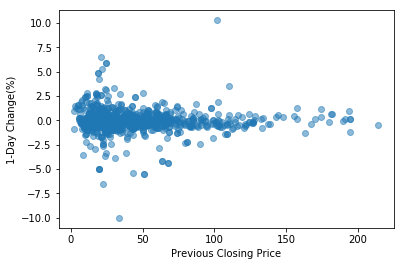

In [13]:
plt.scatter(price["Previous Closing Price"],price["1-Day Change"],alpha=0.5)
plt.xlabel("Previous Closing Price")
plt.ylabel("1-Day Change(%)")
plt.show()

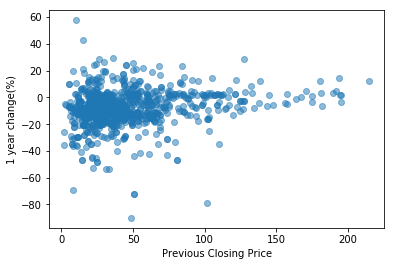

In [14]:

plt.scatter(price["Previous Closing Price"],price["1 year"],alpha=0.5)
plt.xlabel("Previous Closing Price")
plt.ylabel("1 year change(%)")
plt.show()
#tree=DecisionTreeClassifier().fit(price["Previous Closing Price"],price["1-Day Change"])
#visualize_classifier(DecisionTreeClassifer(),price["Previous Closing Price"],price["1-Day Change"])

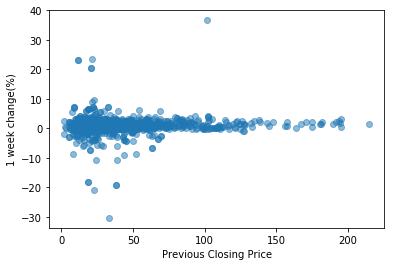

In [15]:
plt.scatter(price["Previous Closing Price"],price["1 Week"],alpha=0.5)
plt.xlabel("Previous Closing Price")
plt.ylabel("1 week change(%)")
plt.show()

/Users/tyllersun/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x1a23c30630> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


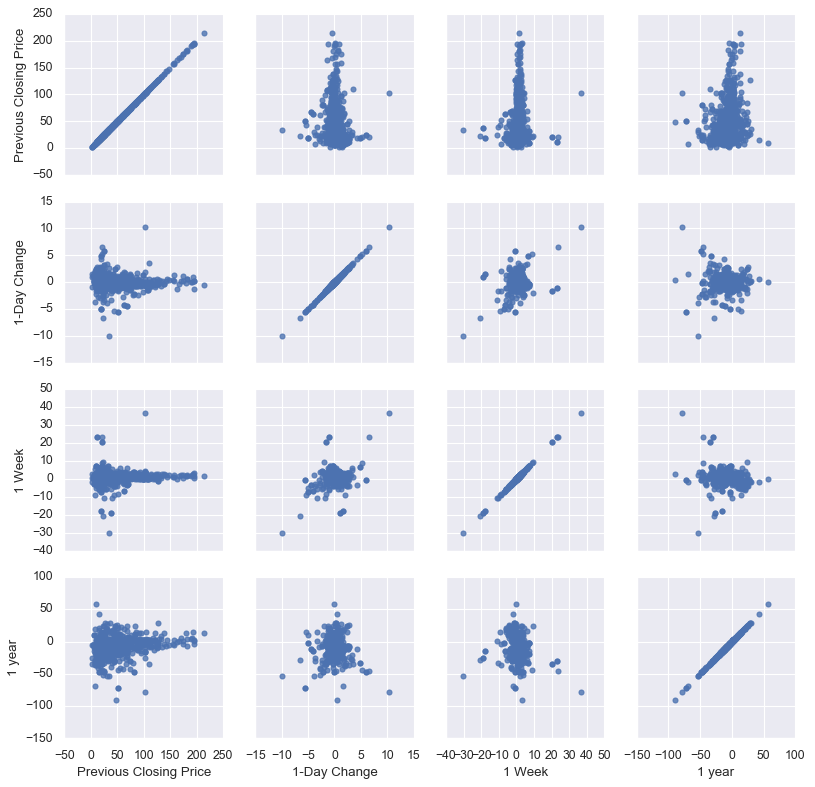

In [17]:
plt.style.use("classic")
import seaborn as sns
sns.set()
g=sns.PairGrid(price,vars=["Previous Closing Price","1-Day Change","1 Week","1 year"])
g.map(plt.scatter,alpha=0.8)
g.add_legend()

In [27]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    print(X)
    rng=np.random.RandomState(rseed)
    i=rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    while True:
        labels=pairwise_distances_argmin(X,centers)
        new_centers=np.array([X[labels==i].mean(0) for i in range(n_custers)])
        if np.all(centers==new_centers):
            break
        centers=new_centers
    return centers, labels
#Closing_to_year=pd.DataFrame([price["Previous Closing Price"],price["1 year"]],columns=["Previous Closing Price","1 year"])
print(Closing_to_year.head())
centers,labels=find_clusters(data,4)

                        Previous Closing Price  1 year
Previous Closing Price                     NaN     NaN
1 year                                     NaN     NaN
     Symbol                                           ETF Name   Asset Class  \
0       AGG               iShares Core U.S. Aggregate Bond ETF          Bond   
1       BND                     Vanguard Total Bond Market ETF          Bond   
2       BSV                       Vanguard Short-Term Bond ETF          Bond   
3      BNDX              Vanguard Total International Bond ETF          Bond   
4      MINT        PIMCO Enhanced Short Maturity Strategy Fund          Bond   
5       BIV                Vanguard Intermediate-Term Bond ETF          Bond   
6      NEAR                    iShares Short Maturity Bond ETF          Bond   
7      SCHZ                     Schwab U.S. Aggregate Bond ETF          Bond   
9      SPAB                  SPDR Portfolio Aggregate Bond ETF          Bond   
10      BLV                        

KeyError: '[899 512 200 143] not in index'

In [ ]:
            
def get_web_page(url,symbol):
    resp=requests.get(url+symbol.lower())
    if resp.status_code!=200:
        return none
    else:
        return resp.text
def get_return(symbol):
    r=get_web_page(website_8,symbol)
    soup=BeautifulSoup(r,"html.parser")
    try:
        week_1=soup.find("table",class_="DataTable").find_all("tr")[1].find("td",class_="col02").text.lstrip()
        week_4=soup.find("table",class_="DataTable").find_all("tr")[1].find("td",class_="col03").text.lstrip()
        year_1=soup.find("table",class_="DataTable").find_all("tr")[1].find("td",class_="col06").text.lstrip()
        year_3=soup.find("table",class_="DataTable").find_all("tr")[1].find("td",class_="col07").text.lstrip()
        year_5=soup.find("table",class_="DataTable").find_all("tr")[1].find("td",class_="col08").text.lstrip()
        return week_4,week_4,year_1,year_3,year_5
    except Exception as e:
        print("aException:%s" %(e))
    return None,None,None,None,None
def get_one_day_change(symbol):
    r=get_web_page(website,symbol)
    soup=BeautifulSoup(r,"html.parser")
    try:
        change=soup.find("table",class_="datalist").find_all("tr")[1].find("td",class_="col03").text.lstrip()
        closing_price=soup.find("table",class_="datalist").find_all("tr")[1].find("td",class_="col02").text.lstrip().replace("(ç¾å)","")
        highest=soup.find("table",class_="datalist").find_all("tr")[1].find("td",class_="col05").text.lstrip()
        lower=soup.find("table",class_="datalist").find_all("tr")[1].find("td",class_="col06").text.lstrip()
        print(change,closing_price)
        return change,closing_price,highest,lower
    except Exception as e:
        print("Exception: %s" %(e))
    return None,None,None,None
    

In [ ]:
def visual_classifier(model,X,y,ax=None,cmap="rainbow"):
    ax=ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=30,cmap=cmap,clim=(y.min(),y.max()),zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
    model.fit(X,y)
    xx,yy=np.meshgrid(np.linspace(*xlim,num=200),np.linspace(*ylin,num=200))
    z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    n_classes=len(np.unique(y))
    contours=ax.contourf(xx,yy,z,alpha=0.3,levels=np.arange(n_classes+1)-0.5,cmap=cmap,clim=(y.min(),y.max()),zorder=1)
    ax.set(xlim=xlim,ylim=ylim)

In [ ]:
def get_web_page_url(symbol):
    resp=requests.get("https://finance.yahoo.com/quote/"+symbol+"/history?period1=1420041600&period2=1553097600&interval=1mo&filter=history&frequency=1mo")
    if resp.status_code!=200:
        return none
    else:
        #print(resp.text)
        return resp.text
    
def get_month(symbol):
    month
    r=get_web_page_url(symbol)
    soup=BeautifulSoup(r,"html.parser")
    trs=soup.find("table",class_="W(100%) M(0)").find_all("tr",class_="BdT Bdc($c-fuji-grey-c) Ta(end) Fz(s) Whs(nw)")
    for tr in trs:
        month[symbol]["date"]=tr.find("td",class_="Py(10px) Ta(start) Pend(10px)")
        print(month[symbol][date])
    #.find("div",class_="Bgc($bg-body) Mih(100%) W(100%) finance US").text
    print(A)
    #except Exception as e:
        #print("Exception: %s" %e)
#https://finance.yahoo.com/quote/GLD/history?period1=1420041600&period2=1553097600&interval=1mo&filter=history&frequency=1mo

